In [42]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plot
import seaborn as sns
from ipywidgets import interact

import riskfolio as rp
from openbb_terminal.sdk import openbb
from openbb_terminal.sdk import TerminalStyle
theme = TerminalStyle("light", "light", "light")

from datetime import date
from datetime import timedelta

In [30]:
# Setting-up the dataframes
my_df = Path('../Resources/portfolio_eli.csv')
omar_df = Path('../Resources/portfolio_omar.csv')
eamonn_df = Path('../Resources/portfolio_eamonn.csv')
mike_df = Path('../Resources/portfolio_mike.csv')

# Clean the data
my_portfolio = pd.read_csv(my_df, index_col='Stock')
my_portfolio['Weight'] = my_portfolio['Weight'].str.replace('%','').astype('float') / 100

omar_portfolio = pd.read_csv(omar_df, index_col='Stock')
omar_portfolio['Weight'] = omar_portfolio['Weight'].str.replace('%','').astype('float') / 100

eamonn_portfolio = pd.read_csv(eamonn_df, index_col='Stock')
eamonn_portfolio['PortFolio Weight'] = eamonn_portfolio['PortFolio Weight'].str.replace('%','').astype('float') / 100

mike_portfolio = pd.read_csv(mike_df)
mike_portfolio['WEIGHT'] = mike_portfolio['WEIGHT'].astype('float')

# Adding the data into lists
my_stock_tickers = my_portfolio['Ticker'].tolist()
my_stock_weights = my_portfolio['Weight'].tolist()

omar_stock_tickers = omar_portfolio['Ticker'].tolist()
omar_stock_weights = omar_portfolio['Weight'].tolist()

eamonn_stock_tickers = eamonn_portfolio['Ticker'].tolist()
eamonn_stock_weights = eamonn_portfolio['PortFolio Weight'].tolist()

mike_stock_tickers = mike_portfolio['STOCK'].tolist()
mike_stock_weights = mike_portfolio['WEIGHT'].tolist()

In [3]:
# Setup for end_date, calling on last full day.
today = date.today()

# Getting the initial date ranges for review
startdate = date(2018,1,1)
end_date = today - timedelta(days = 1)
print(end_date)
print(f'There are {len(my_stock_tickers)} individual stocks in your portfolio')

2023-02-15
There are 6 individual stocks in your portfolio


In [5]:
my_data = openbb.economy.index(my_stock_tickers, start_date=startdate, end_date=end_date)

In [6]:
omar_data = openbb.economy.index(omar_stock_tickers, start_date=startdate, end_date=end_date)

In [7]:
eamonn_data = openbb.economy.index(eamonn_stock_tickers, start_date=startdate, end_date=end_date)

In [31]:
mike_data = openbb.economy.index(mike_stock_tickers, start_date=startdate, end_date=end_date)

In [32]:
# Getting Daily Returns for All Portfolios
my_daily_returns = my_data.pct_change()
my_daily_returns = my_daily_returns.dropna()
my_portfolio_returns = my_daily_returns.dot(my_stock_weights)

omar_stock_daily_returns = omar_data.pct_change()
omar_stock_daily_returns = omar_stock_daily_returns.dropna()
omar_portfolio_returns = omar_stock_daily_returns.dot(omar_stock_weights)

eamonn_stock_daily_returns = eamonn_data.pct_change()
eamonn_stock_daily_returns = eamonn_stock_daily_returns.dropna()
eamonn_portfolio_returns = eamonn_stock_daily_returns.dot(eamonn_stock_weights)

mike_stock_daily_returns = mike_data.pct_change()
mike_stock_daily_returns = mike_stock_daily_returns.dropna()
mike_portfolio_returns = mike_stock_daily_returns.dot(mike_stock_weights)

In [9]:
sap_ticker = ['SPY']

sap_data = openbb.economy.index(sap_ticker, start_date=startdate, end_date=end_date)
sap_daily_returns = sap_data.pct_change()
sap_daily_returns = sap_daily_returns.dropna()
sap_daily_returns

,SPY
Date,
2018-01-03,0.006325
2018-01-04,0.004215
2018-01-05,0.006664
2018-01-08,0.001828
2018-01-09,0.002264
...,...
2023-02-08,-0.010935
2023-02-09,-0.008669
2023-02-10,0.002334


In [33]:
combined_df = pd.concat([my_portfolio_returns, omar_portfolio_returns, eamonn_portfolio_returns, mike_portfolio_returns, sap_daily_returns], axis='columns', join='inner')
combined_df.rename(columns={0:'My Portfolio Returns',1:'Omars Returns',2:'Eamonns Returns',3:'Mikes Returns'}, inplace=True)
combined_df

,My Portfolio Returns,Omars Returns,Eamonns Returns,Mikes Returns,SPY
Date,,,,,
2020-12-11,-0.000582,0.000239,-0.001965,0.014512,-0.001173
2020-12-14,0.000394,-0.001890,-0.009782,-0.007386,-0.004477
2020-12-15,0.016603,0.006473,0.011737,0.012486,0.013519
2020-12-16,0.004177,0.003867,-0.002651,-0.000905,0.001569
2020-12-17,0.009177,0.010483,0.000551,0.005224,0.005592
...,...,...,...,...,...
2023-02-08,-0.013095,-0.012227,-0.005625,-0.005345,-0.010935
2023-02-09,-0.008173,-0.008850,-0.013116,-0.007320,-0.008669
2023-02-10,0.000546,-0.008336,0.005543,-0.004212,0.002334


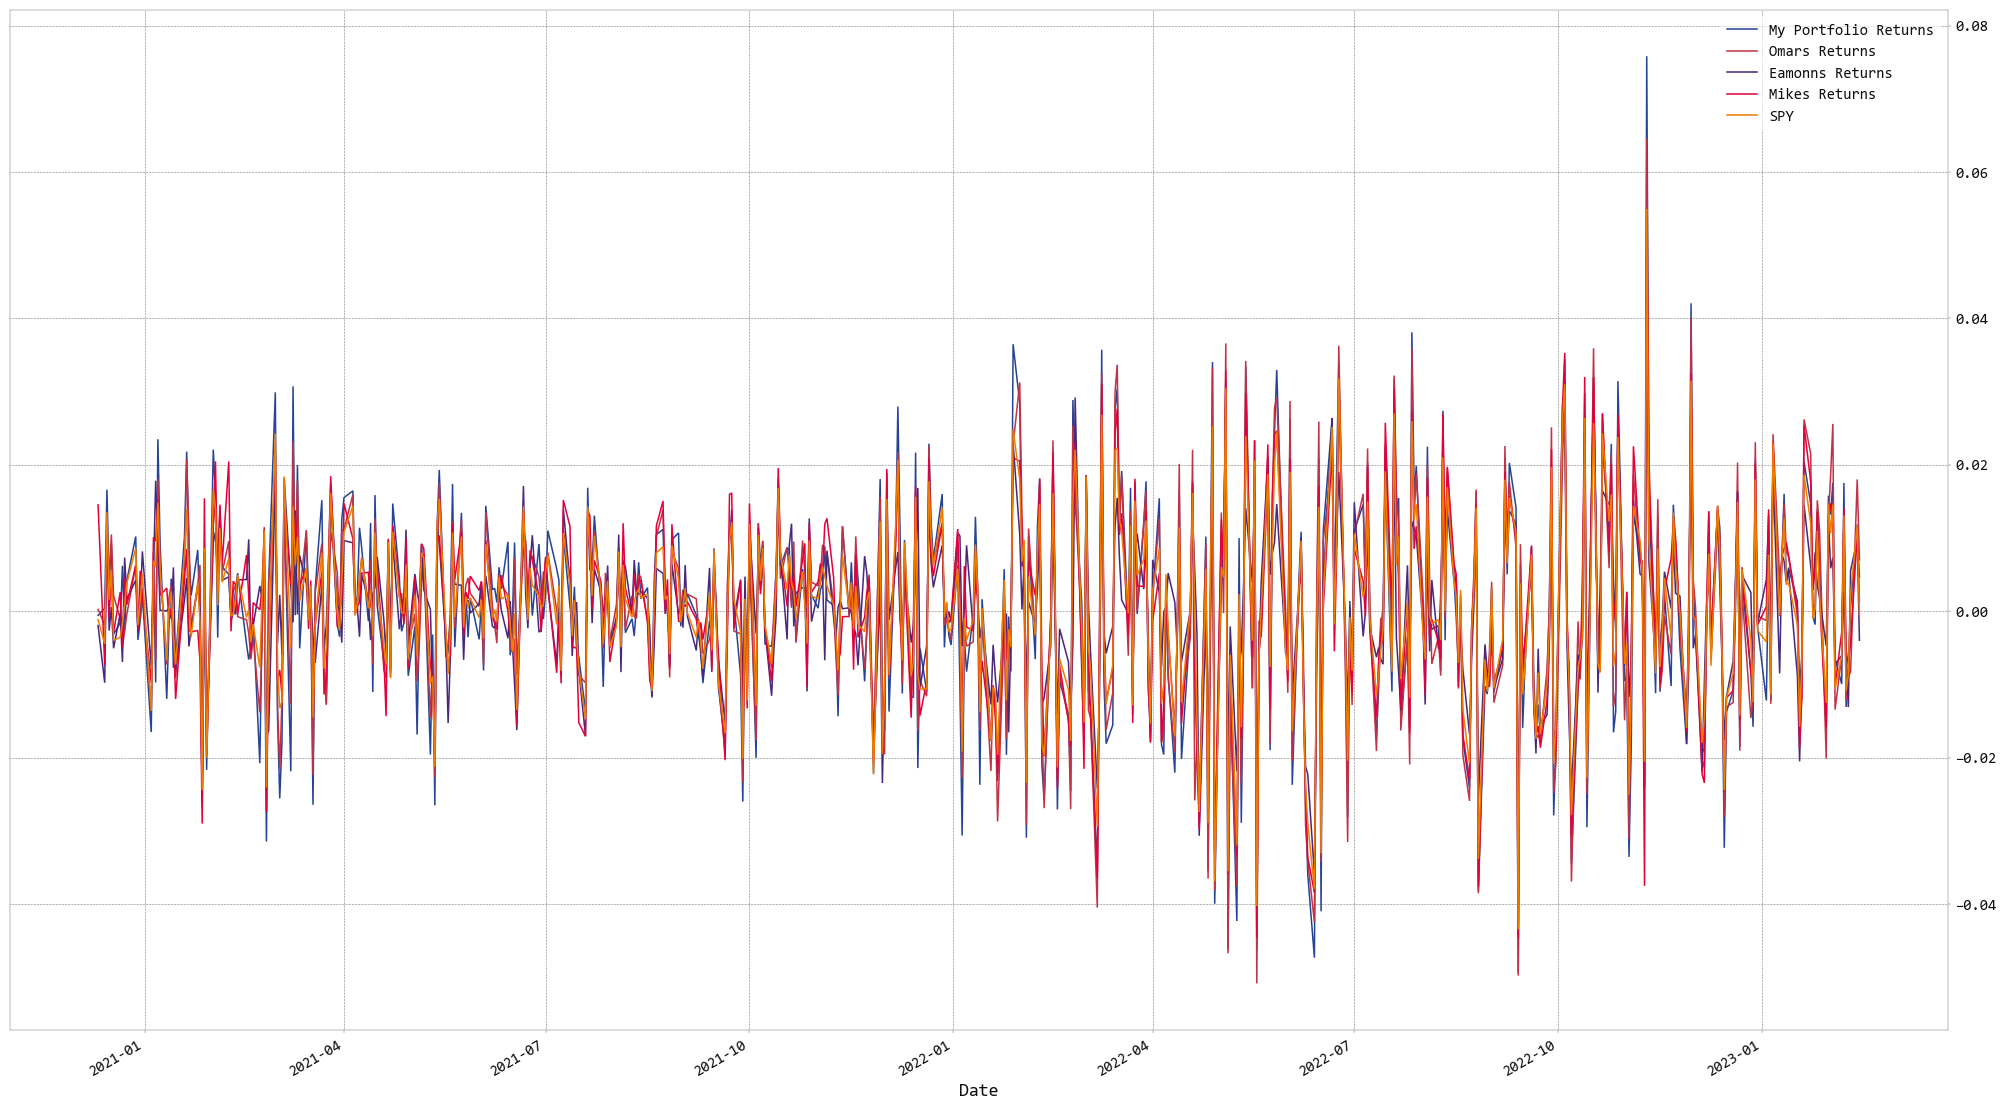

In [34]:
combined_df.plot(figsize=(25,15),

).autoscale()

interactive(children=(Checkbox(value=True, description='omar_portfolio_returns'), Checkbox(value=True, descrip…

<function __main__.plotter_fun(omar_portfolio_returns=True, my_portfolio_returns=True, eamonn_portfolio_returns=True, mike_portfolio_returns=True)>

In [35]:
portfolio_std = pd.DataFrame(combined_df.std())
portfolio_std = portfolio_std.rename(columns= {0:'Standard Deviation'})
portfolio_std

,Standard Deviation
My Portfolio Returns,0.015115
Omars Returns,0.014477
Eamonns Returns,0.010143
Mikes Returns,0.013067
SPY,0.012034


In [37]:
# Lets Test Our Portfolios
initial_investment = 10000

<Axes: title={'left': 'Eli'}, xlabel='Date'>

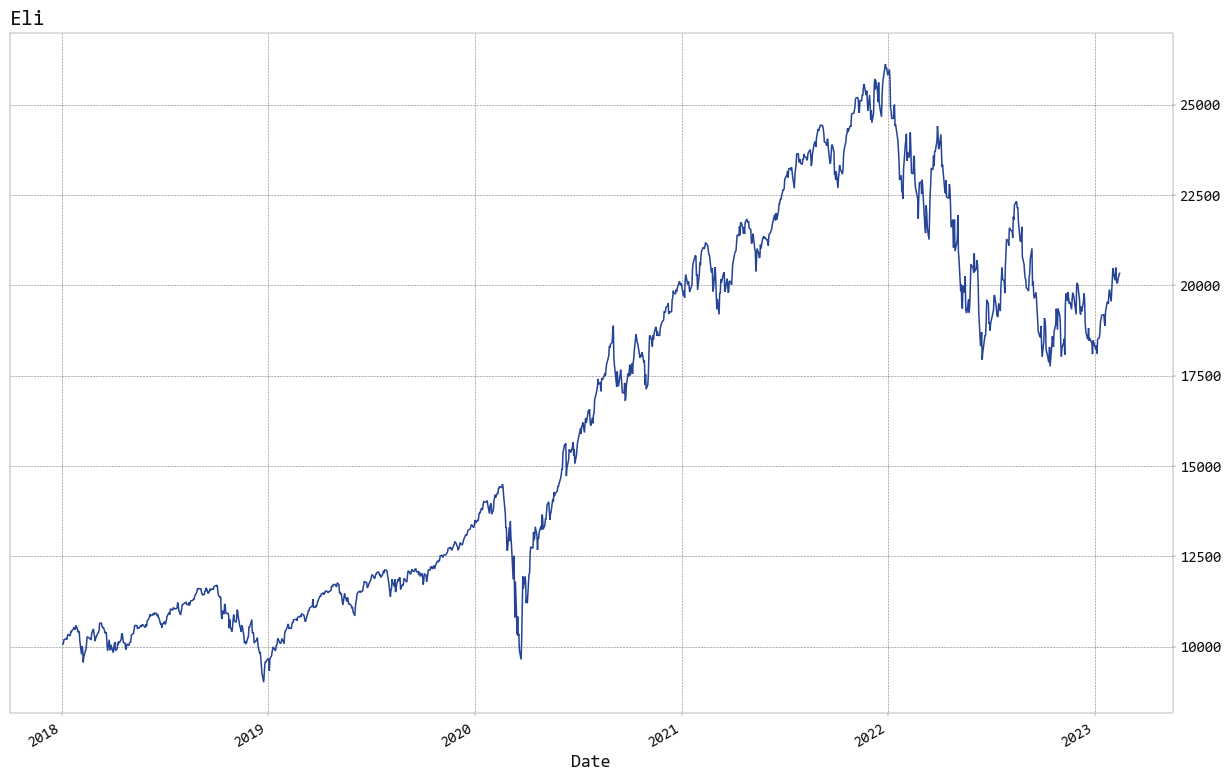

In [38]:
cummulative_returns = (1 + my_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Eli",
    figsize = (15, 10)
)

<Axes: title={'left': 'Omar'}, xlabel='Date'>

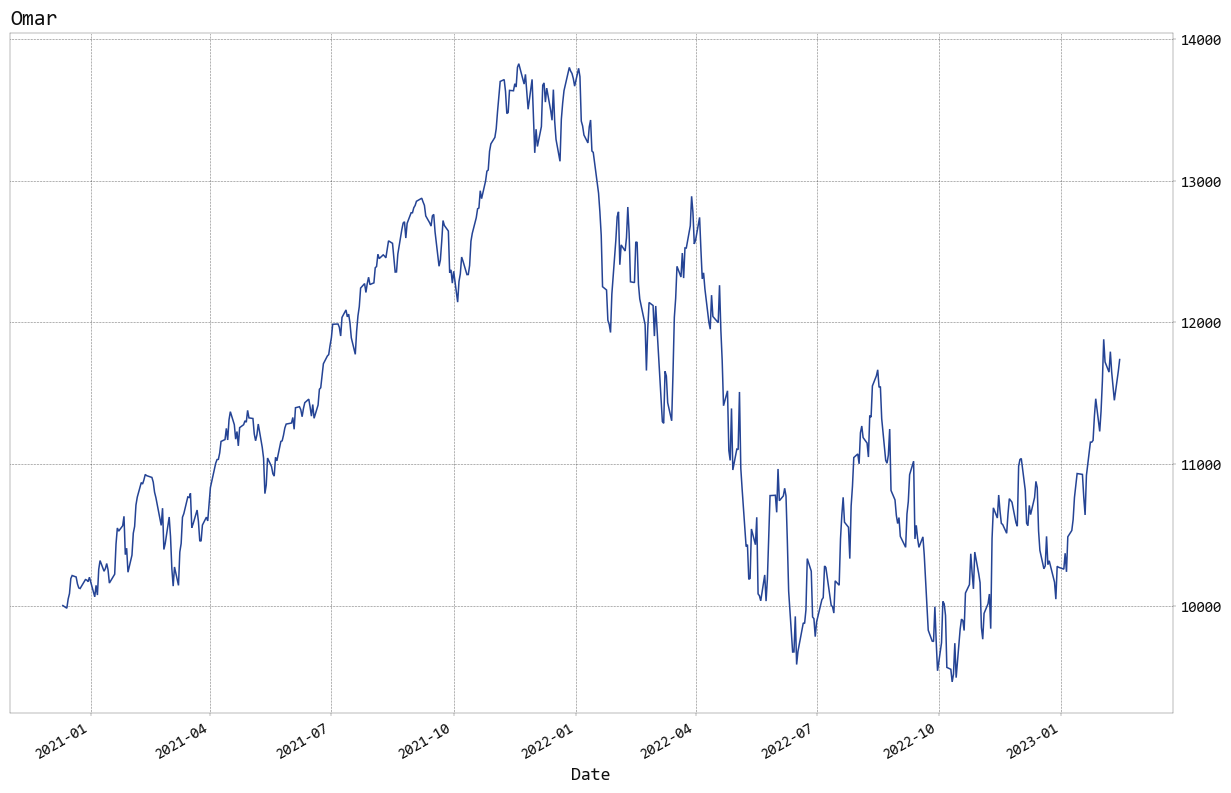

In [39]:
cummulative_returns = (1 + omar_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Omar",
    figsize = (15, 10)
)

<Axes: title={'left': 'Eamonn'}, xlabel='Date'>

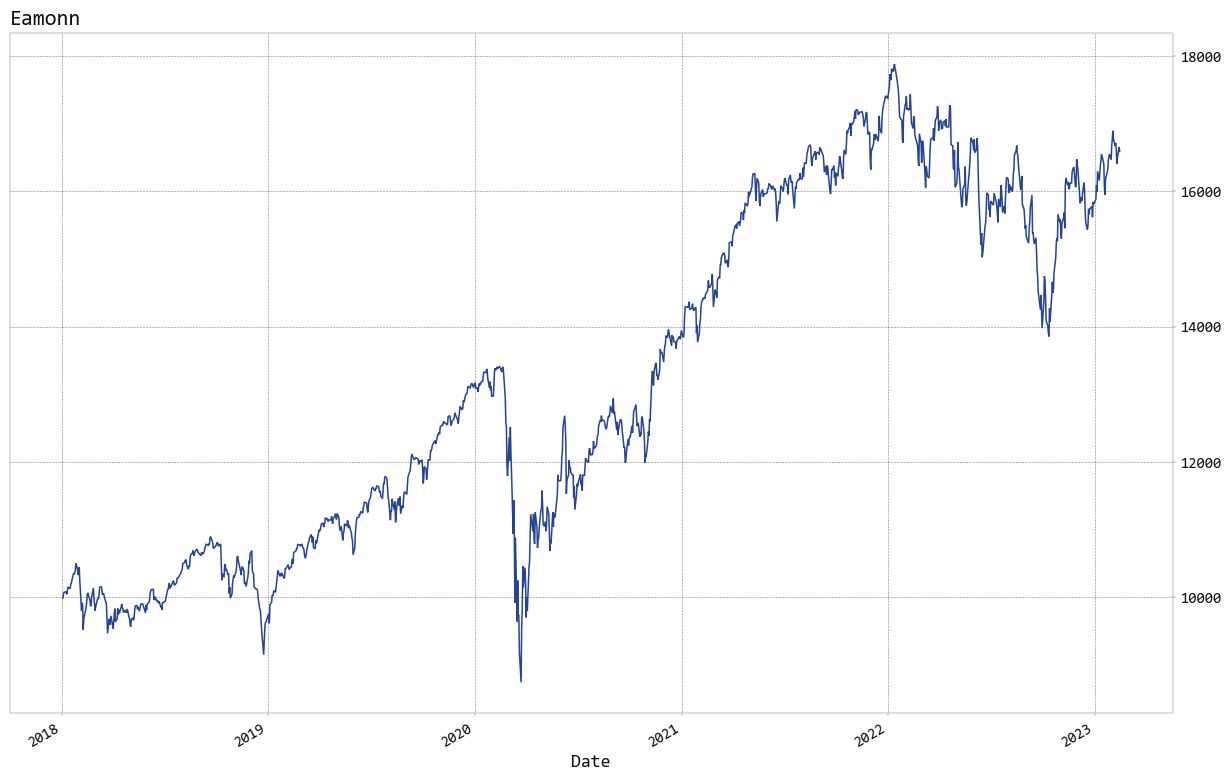

In [40]:
cummulative_returns = (1 + eamonn_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Eamonn",
    figsize = (15, 10)
)

<Axes: title={'left': 'Mike'}, xlabel='Date'>

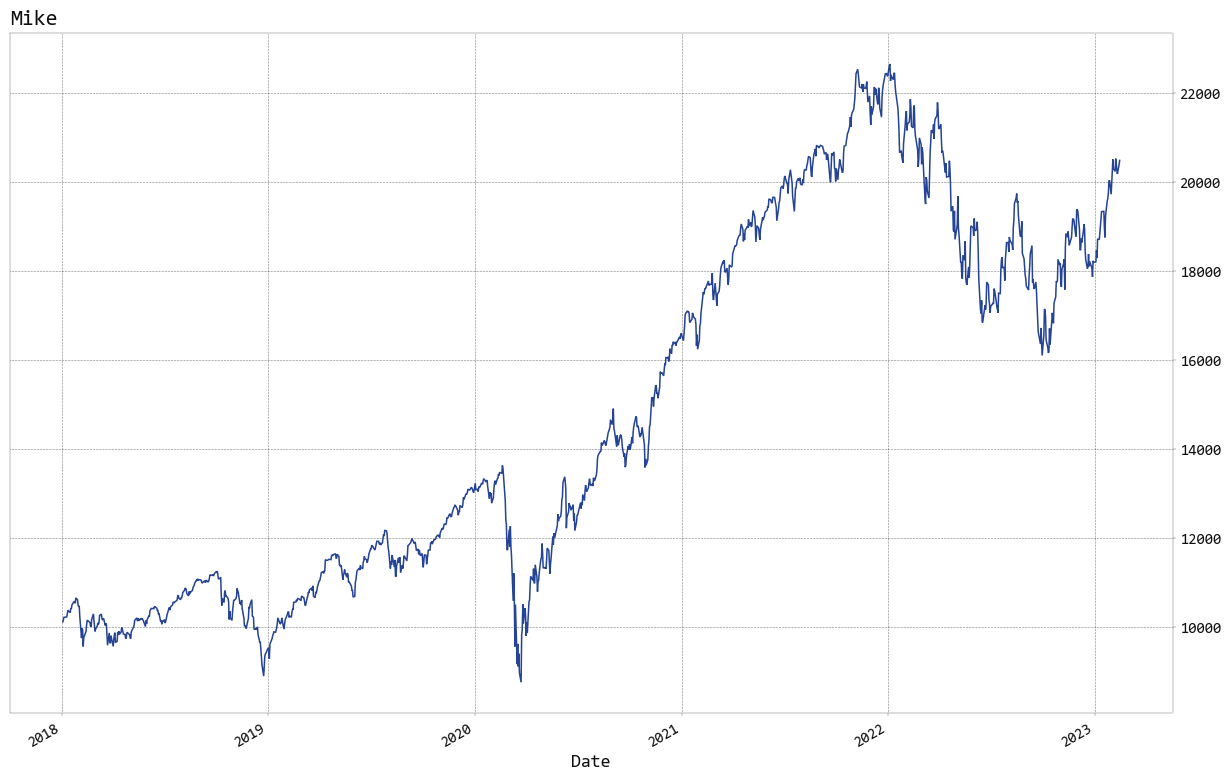

In [41]:
cummulative_returns = (1 + mike_portfolio_returns).cumprod()
(initial_investment * cummulative_returns).plot(
    title = "Mike",
    figsize = (15, 10)
)

In [22]:
stocks = openbb.stocks.disc.asc()
stocks.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,SKLZ,Skillz Inc.,0.8468,0.0582,+7.38%,3.327M,9.797M,355.913M,
1,TLRY,"Tilray Brands, Inc.",3.0542,0.0842,+2.84%,6.646M,19.273M,1.88B,7.27
2,UP,Wheels Up Experience Inc.,1.1500,0.0200,+1.77%,453656,1.576M,284.628M,
3,SDC,"SmileDirectClub, Inc.",0.6121,0.0221,+3.75%,227459,2.794M,237.562M,
4,OPEN,Opendoor Technologies Inc.,2.3400,0.1800,+8.33%,12.029M,25.44M,1.484B,
